In [1]:
# library & install
from google.colab import drive
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor 모델 (Random Forest Regressor model)
from sklearn.model_selection import train_test_split, RandomizedSearchCV # 데이터 분할 및 하이퍼파라미터 튜닝

In [2]:
import sys
import os

# Specify the path to the directory containing data_load.py
# Make sure this path is correct and accessible from your Colab environment
data_load_path = '/content/drive/MyDrive/utils'

# Add the directory to sys.path to allow importing modules from it
sys.path.append(data_load_path)

try:
    # Import the data_load module
    import data_load

    # Now you can use functions from the data_load module, for example:
    # from data_load import your_function_name
    # your_function_name()

    print("Successfully imported data_load.py")

    combined_df = data_load.load_data(start_date='2025-01-01', end_date='2025-03-31')

except ImportError as e:
    print(f"Error importing data_load.py: {e}")
    print(f"Please ensure data_load.py exists at {os.path.join(data_load_path, 'data_load.py')} and the file name is correct.")



Successfully imported data_load.py
🔍 ['2025-01-01'부터 '2025-03-31'까지의 데이터를 로드]


/content/drive/MyDrive/utils/data_load.py:48: DtypeWarning: Columns (19,20,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv(
/content/drive/MyDrive/utils/data_load.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs_to_concat, ignore_index=True)



✅ 총 90개 파일, 3114197개 행의 데이터를 성공적으로 합쳤습니다.


In [3]:
# Specify the path to the directory containing preprocessor.py
# Make sure this path is correct and accessible from your Colab environment
preprocessor_path = '/content/drive/MyDrive/utils'

# Add the directory to sys.path to allow importing modules from it
sys.path.append(preprocessor_path)

try:
    # Import the preprocessor module
    import preprocessor

    print("Successfully imported preprocessor.py")

except ImportError as e:
    print(f"Error importing preprocessor.py: {e}")
    print(f"Please ensure preprocessor.py exists at {os.path.join(preprocessor_path, 'preprocessor.py')} and the file name is correct.")

Successfully imported preprocessor.py


In [4]:
# Identify columns that are currently of object type
object_cols = combined_df.select_dtypes(include=['object']).columns

# Convert all values in object columns to string type to ensure uniform input for potential LabelEncoding within preprocessor.py
for col in object_cols:
    combined_df[col] = combined_df[col].astype(str)
    print(f"✅ 컬럼 '{col}'을(를) 문자열 타입으로 변환 완료")

combined_df = preprocessor.preprocessor(combined_df)



✅ 컬럼 '생성일'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '급수펌프 입력'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '배기가스온도2'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '배기가스온도3'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '배기 재 순환 온도'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '에코 온도1'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '에코 온도2'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '버너온도'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '재순환 O2'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '재순환 NOx'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '운전시간'을(를) 문자열 타입으로 변환 완료
✅ 컬럼 '확률 업데이트 시간'을(를) 문자열 타입으로 변환 완료
--- 데이터 전처리 시작 ---
✅ 1. 불필요한 컬럼 14개 제거 완료
✅ 2-1. 범주형 데이터 결측치 처리 완료
✅ 2-2. 범주형 변수 변환 완료
ℹ️ 2-3. 처리할 수치형 결측치가 없습니다.
✅ 3. 피처 스케일링 완료
--- 데이터 전처리 완료 ---


In [1]:
!sudo apt-get -qq install fonts-nanum

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [5]:
# Fix broken Korean fonts
import matplotlib as mpl
import matplotlib.font_manager as fm
from pathlib import Path

# ① Set the path to the installed font file (change to the path verified by fc-list)
font_path_candidates = [
    "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",                 # Nanum Gothic
    "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",          # Noto CJK (opentype)
    "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc",          # Noto CJK (truetype)
]
font_path = next((p for p in font_path_candidates if Path(p).exists()), None)
assert font_path is not None, "Font file not found. Please verify the path with fc-list and update font_path."

# ② Register the font file directly with Matplotlib
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()

# ③ Set as global default font + prevent minus sign issues
mpl.rcParams["font.family"] = font_name
mpl.rcParams["axes.unicode_minus"] = False

In [6]:
# separate features and target
y_col = '효율(순간)'
X = combined_df.drop(columns=[y_col])
y = combined_df[y_col]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [7]:
# ## 하이퍼파라미터 튜닝 (Hyperparameter Tuning)

# RandomizedSearchCV를 사용하여 Random Forest 모델의 최적 하이퍼파라미터 조합을 탐색합니다.
# Use RandomizedSearchCV to find the optimal combination of hyperparameters for the Random Forest model.
best_params_rf = None # Initialize variable to store best parameters
# Proceed only if training data is available
if X_train is not None and y_train is not None:
    print("\n--- 하이퍼파라미터 튜닝 시작 (Starting Hyperparameter Tuning - RandomizedSearchCV for RandomForest) ---")
    # Initialize the Random Forest Regressor model for tuning
    # random_state for reproducibility, n_jobs=-1 to use all CPU cores
    rf_model_tune = RandomForestRegressor(random_state=42, n_jobs=-1)

    # Define the parameter space (distributions) to sample from during Randomized Search
    param_dist_rf = {
        'n_estimators': np.arange(50, 501, 50),     # Number of trees: 50, 100, ..., 500
        'max_depth': [None] + list(np.arange(5, 31, 5)), # Max depth: None (unlimited), 5, 10, ..., 30
        'min_samples_split': [2, 5, 10, 15],         # Min samples to split a node: 2, 5, 10, 15
        'min_samples_leaf': [1, 3, 5, 7],            # Min samples at a leaf node: 1, 3, 5, 7
        'max_features': ['sqrt', 'log2', 0.5, 0.7] # Max features for split: sqrt(n_features), log2(n_features), 50%, 70%
        # 'bootstrap': [True, False] # Whether bootstrap samples are used (optional)
    }

    # Configure RandomizedSearchCV
    # n_iter: Number of parameter settings that are sampled. Trades off runtime vs quality of the solution.
    # cv: Number of cross-validation folds.
    # scoring: Strategy to evaluate the performance of the cross-validated model on the test set. 'neg_mean_squared_error' is common for regression.
    # verbose: Controls the verbosity: the higher, the more messages.
    # n_jobs=-1: Use all available CPU cores for parallel processing.
    n_iterations = 3 # Number of iterations (parameter combinations to try). Adjust based on available time.
    cv_folds = 3      # Number of cross-validation folds. Adjust based on available time/data size.

    random_search_rf = RandomizedSearchCV(
        estimator=rf_model_tune,           # The model to tune
        param_distributions=param_dist_rf, # The distributions to sample parameters from
        n_iter=n_iterations,               # Number of parameter settings that are sampled
        scoring='neg_mean_squared_error',  # Metric to evaluate the performance (negative MSE)
        cv=cv_folds,                       # Number of cross-validation folds
        verbose=1,                         # Print progress messages
        random_state=42,                   # Seed for reproducibility
        n_jobs=-1                          # Use all available CPU cores
    )

    # Randomized Search 실행 (Execute Randomized Search on the training data)
    try:
        print(f"{n_iterations}개 조합, {cv_folds}-겹 교차 검증으로 Randomized Search 실행... (Running Randomized Search with {n_iterations} combinations and {cv_folds}-fold CV...)")
        # Fit RandomizedSearchCV to find the best parameters
        random_search_rf.fit(X_train, y_train)
        # Store the best parameters found
        best_params_rf = random_search_rf.best_params_
        print("\n✅ 하이퍼파라미터 튜닝 완료 (Hyperparameter tuning complete)")
        print("최적 하이퍼파라미터 (Best hyperparameters - Random Forest):", best_params_rf)
        # The best_score_ attribute gives the score for the best parameters found.
        # Since scoring='neg_mean_squared_error', a higher score (closer to 0) is better.
        print(f"최고 교차 검증 점수 (Best cross-validation score - Negative MSE): {random_search_rf.best_score_:.6f}")
    # Handle potential errors during the tuning process
    except Exception as e:
        print(f"❌ 하이퍼파라미터 튜닝 중 오류 발생 (Error during hyperparameter tuning): {e}")
        best_params_rf = None # Reset best parameters on error



--- 하이퍼파라미터 튜닝 시작 (Starting Hyperparameter Tuning - RandomizedSearchCV for RandomForest) ---
3개 조합, 3-겹 교차 검증으로 Randomized Search 실행... (Running Randomized Search with 3 combinations and 3-fold CV...)
Fitting 3 folds for each of 3 candidates, totalling 9 fits

✅ 하이퍼파라미터 튜닝 완료 (Hyperparameter tuning complete)
최적 하이퍼파라미터 (Best hyperparameters - Random Forest): {'n_estimators': np.int64(150), 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.7, 'max_depth': np.int64(20)}
최고 교차 검증 점수 (Best cross-validation score - Negative MSE): -0.000333


In [8]:
 ## 최종 모델 학습 및 평가 (Final Model Training & Evaluation)

# RandomizedSearchCV를 통해 찾은 최적 하이퍼파라미터 조합을 사용하여 최종 Random Forest 모델을 학습시키고, 테스트 데이터로 성능을 평가합니다.
# Import necessary metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Import the preprocessor.py module and apply the preprocessing function to the loaded data.
rf_final_model = None # Initialize final model variable to None
# Proceed only if best parameters were found and training data exists
if best_params_rf is not None and X_train is not None and y_train is not None:
    print("\n--- 최적 파라미터로 Random Forest 모델 학습 및 평가 시작 (Starting final Random Forest model training and evaluation with best parameters) ---")
    # Initialize the final model using the best parameters found
    # The ** operator unpacks the dictionary into keyword arguments
    rf_final_model = RandomForestRegressor(
        **best_params_rf,
        random_state=42, # Ensure reproducibility for the final model
        n_jobs=-1        # Use all CPU cores
    )

    # 모델 학습 (Train the final model on the entire training dataset)
    try:
        print("최적 모델 학습 중... (Training the optimal model...)")
        # Fit the model
        rf_final_model.fit(X_train, y_train)
        print("✅ 모델 학습 완료 (Model training complete)")

        # 예측 수행 (Make predictions on both training and test data)
        print("예측 수행 중... (Making predictions...)")
        y_train_pred_rf = rf_final_model.predict(X_train) # Predictions on training data
        y_test_pred_rf = rf_final_model.predict(X_test)   # Predictions on test data
        print("✅ 예측 수행 완료 (Prediction complete)")

        # 평가 지표 계산 (Calculate various evaluation metrics)
        print("평가 지표 계산 중... (Calculating evaluation metrics...)")
        # R-squared (Coefficient of Determination)
        train_r2_rf = r2_score(y_train, y_train_pred_rf)
        test_r2_rf = r2_score(y_test, y_test_pred_rf)
        # Mean Squared Error (MSE)
        train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
        test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
        # Mean Absolute Error (MAE)
        train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
        test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
        # Root Mean Squared Error (RMSE)
        train_rmse_rf = np.sqrt(train_mse_rf)
        test_rmse_rf = np.sqrt(test_mse_rf)

        # MAPE 계산 함수 정의 (Define MAPE function to handle potential division by zero)
        def mean_absolute_percentage_error(y_true, y_pred):
            # Convert inputs to numpy arrays
            y_true, y_pred = np.array(y_true), np.array(y_pred)
            # Create a mask for non-zero true values to avoid division by zero
            non_zero_mask = y_true != 0
            # If all true values are zero, return NaN
            if np.sum(non_zero_mask) == 0: return np.nan
            # Calculate MAPE only for non-zero true values and take the mean
            return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

        # Calculate Mean Absolute Percentage Error (MAPE)
        train_mape_rf = mean_absolute_percentage_error(y_train, y_train_pred_rf)
        test_mape_rf = mean_absolute_percentage_error(y_test, y_test_pred_rf)

        # 근사 정확도 계산 함수 (Calculate approximate accuracy within a tolerance)
        def approximate_accuracy(y_true, y_pred, tolerance=0.01):
            y_true, y_pred = np.array(y_true), np.array(y_pred)
            # Calculate the absolute difference between true and predicted values
            absolute_errors = np.abs(y_true - y_pred)
            # Count the number of predictions within the tolerance
            within_tolerance = np.sum(absolute_errors <= tolerance)
            # Calculate the percentage of predictions within tolerance
            accuracy = (within_tolerance / len(y_true)) * 100
            return accuracy

        # 근사 정확도 계산 (Calculate approximate accuracy)
        train_approx_accuracy_rf = approximate_accuracy(y_train, y_train_pred_rf, tolerance=0.01)
        test_approx_accuracy_rf = approximate_accuracy(y_test, y_test_pred_rf, tolerance=0.01)


        # 결과 출력 (Print the calculated evaluation metrics)
        print("\n--- Random Forest 모델 평가 결과 (튜닝 후) (Random Forest Model Evaluation Results - Tuned) ---")
        print(f"Train R2: {train_r2_rf:.6f}")
        print(f"Test R2 : {test_r2_rf:.6f}")
        # Interpret R-squared as a measure of "accuracy" for regression
        print(f"Test R2 ({test_r2_rf:.4f}) indicates that approximately {test_r2_rf*100:.2f}% of the variance in the target variable can be explained by the model.")
        print(f"Train MSE: {train_mse_rf:.6f}")
        print(f"Test MSE : {test_mse_rf:.6f}")
        print(f"Train MAE: {train_mae_rf:.6f}")
        print(f"Test MAE : {test_mae_rf:.6f}")
        print(f"Train RMSE: {train_rmse_rf:.6f}")
        print(f"Test RMSE : {test_rmse_rf:.6f}")
        # Check if MAPE is NaN before formatting
        train_mape_str = f"{train_mape_rf:.4f}%" if not np.isnan(train_mape_rf) else "N/A (y_train contains zeros)"
        test_mape_str = f"{test_mape_rf:.4f}%" if not np.isnan(test_mape_rf) else "N/A (y_test contains zeros)"
        print(f"Train MAPE: {train_mape_str}")
        print(f"Test MAPE : {test_mape_str}")
        # Print approximate accuracy labeled as "Accuracy"
        print(f"Train Accuracy: {train_approx_accuracy_rf:.2f}%")
        print(f"Test Accuracy: {test_approx_accuracy_rf:.2f}%")


    # Handle potential errors during final model training or evaluation
    except Exception as e:
        print(f"❌ 모델 학습 또는 평가 중 오류 발생 (Error during model training or evaluation): {e}")
        rf_final_model = None # Reset final model variable on error


--- 최적 파라미터로 Random Forest 모델 학습 및 평가 시작 (Starting final Random Forest model training and evaluation with best parameters) ---
최적 모델 학습 중... (Training the optimal model...)
✅ 모델 학습 완료 (Model training complete)
예측 수행 중... (Making predictions...)
✅ 예측 수행 완료 (Prediction complete)
평가 지표 계산 중... (Calculating evaluation metrics...)

--- Random Forest 모델 평가 결과 (튜닝 후) (Random Forest Model Evaluation Results - Tuned) ---
Train R2: 0.999916
Test R2 : 0.999904
Test R2 (0.9999) indicates that approximately 99.99% of the variance in the target variable can be explained by the model.
Train MSE: 0.000084
Test MSE : 0.000097
Train MAE: 0.000211
Test MAE : 0.000277
Train RMSE: 0.009185
Test RMSE : 0.009840
Train MAPE: 0.0629%
Test MAPE : 0.0801%
Train Accuracy: 99.72%
Test Accuracy: 99.62%


         feature  importance
29     급수량(순간유량)    0.426167
31     연료량(순간유량)    0.264880
17       배기가스온도1    0.068649
5          급수 펌프    0.066085
15         급수 수위    0.048949
4         송풍기 입력    0.048265
22        에코 온도2    0.019579
14  재순환 외기 댐퍼 입력    0.018873
10     Air 댐퍼 입력    0.014339
3     송풍기 인버터 출력    0.004994


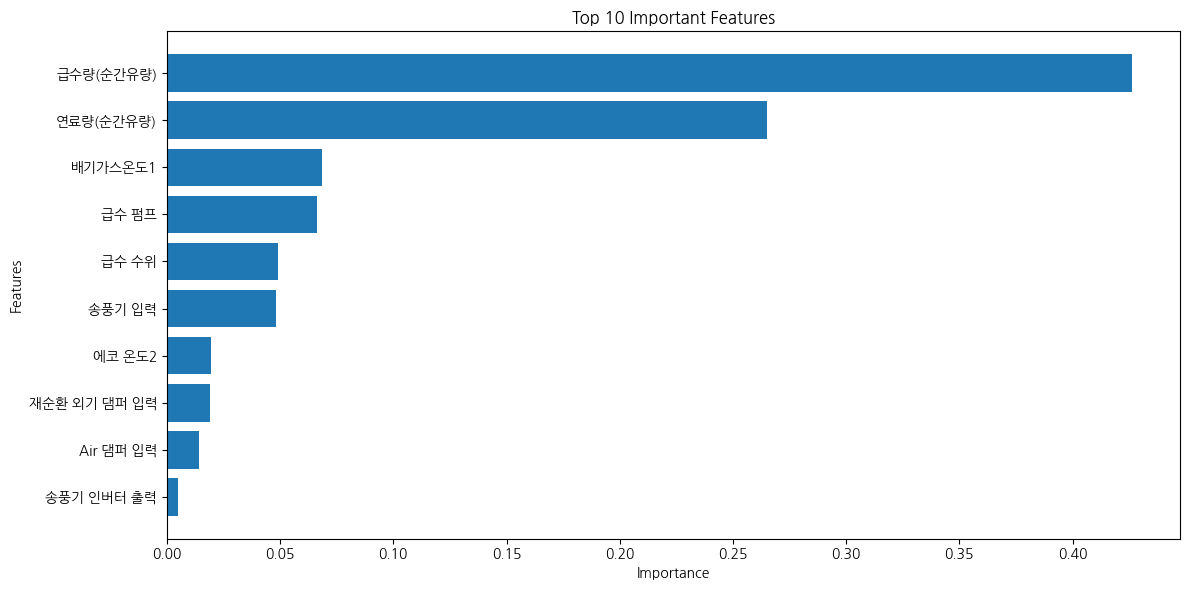


--- 모든 작업 완료 (All tasks completed) ---


In [9]:
# ## 특성 중요도 분석 (Feature Importance Analysis)

# 학습된 최종 Random Forest 모델의 특성 중요도를 확인하고 시각화합니다.
# Check and visualize the feature importances of the trained final Random Forest model.
# Proceed only if the final model was trained successfully and training data exists

# show most important features (특성 중요도 표시)
importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': rf_final_model.feature_importances_
}).sort_values(by="importance", ascending=False)

print(importance.head(10))

# Select the top 10 important features (or adjust the number as needed)
top_n = 10
top_features = importance.head(top_n).iloc[::-1] # Reverse the order

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top {} Important Features'.format(top_n))
plt.tight_layout()
plt.show()

# Indicate the end of the notebook execution
print("\n--- 모든 작업 완료 (All tasks completed) ---")

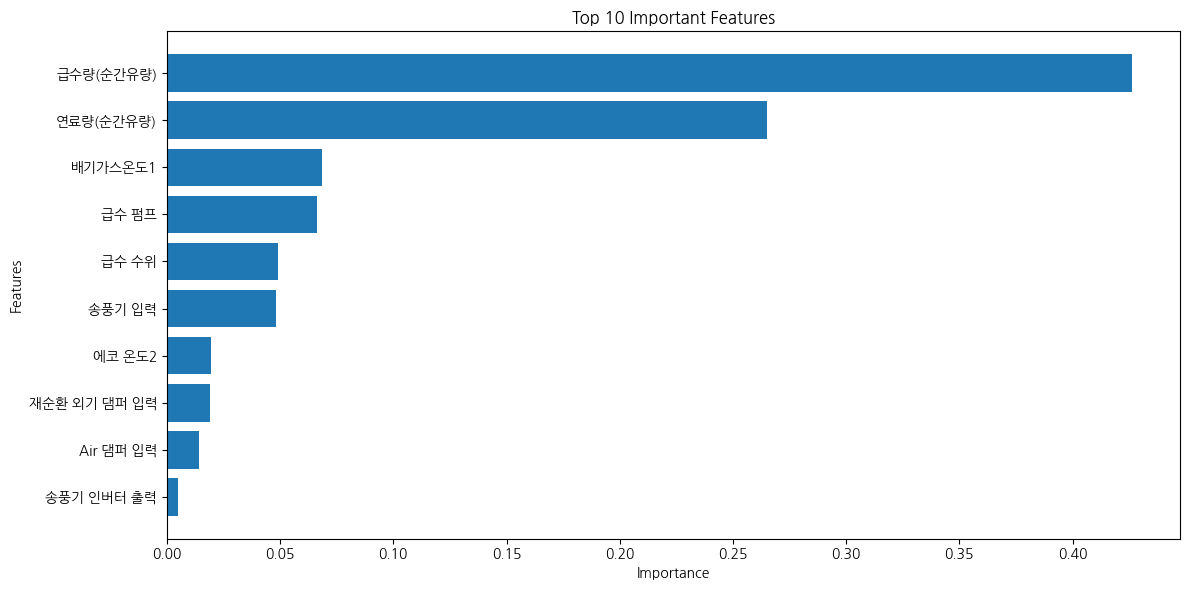

In [10]:
# Select the top 10 important features (or adjust the number as needed)
top_n = 10
top_features = importance.head(top_n).iloc[::-1] # Reverse the order

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top {} Important Features'.format(top_n))
plt.tight_layout()
plt.show()